In [1]:
#SIR
import numpy as np

beta=3
gamma=1

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_S[0]=0.99
v_I[0]=0.01

# SIR
for t in range(nsteps):
    v_S[t+1]=v_S[t]-dt*beta*v_S[t]*v_I[t]
    v_I[t+1]=v_I[t]+dt*beta*v_S[t]*v_I[t]-gamma*v_I[t]*dt
    v_R[t+1]=v_R[t]+gamma*v_I[t]*dt

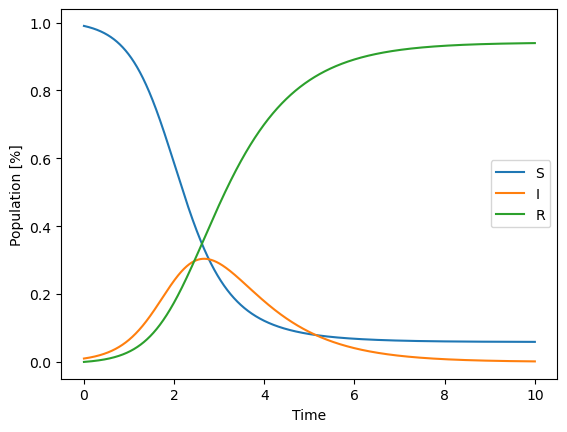

In [3]:
#SIR diagram
import matplotlib.pyplot as plt
trange=[t*dt for t in range(nsteps+1)]
plt.figure()

plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR.png', bbox_inches='tight') #Ábra mentése

In [4]:
#SIR modellből kinyert adatok generálása
#halottak száma (v_R)
deaths = 0.00
for i in v_R:
    deaths += i

print(sum(v_R))
    
print('Total number of deaths: ', deaths)

#Összes fertőzőttek száma (v_I)
infected = sum(v_I)*dt

#infected += deaths
print('Total number of infections: ', infected)

#Maximális megbetegedések száma egyszerre
beteg = 0.00
for i in v_I:
    if(i > beteg):
        beteg = i

print('Maximum amount of infected people at the same time: ', beteg)

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
t = 0.05
greater = 0.000
for i in v_I:
    if(i > t):
        greater += dt
        
print('Length of time when v_I(t)>t: ', greater)

6348.585143311749
Total number of deaths:  6348.585143311749
Total number of infections:  0.9393846432467118
Maximum amount of infected people at the same time:  0.3039299066025501
Length of time when v_I(t)>t:  4.885999999999966
